In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm as tqdmflat

import spacy
from spacy.lang.en import English
import os

from simpletransformers.classification import ClassificationModel

import logging


In [2]:
PATH = 'data/'
biz=pd.read_csv(os.path.join(PATH,"yelp_business.csv"))
reviews=pd.read_csv(os.path.join(PATH,"yelp_review.csv"))

In [3]:


col = ['neighborhood', 'address', 'latitude', 'longitude', 'stars']
biz.drop(columns=col, inplace=True)    

biz.categories = biz.categories.apply(lambda x: x.split(";"))

biz = biz[
    (biz.city == 'Cleveland') & 
    (biz.state == 'OH') & 
    (biz.is_open == 1) & 
    (biz.categories.apply(
        lambda x: True if 'Restaurants' in x else False
    ))]



In [4]:
df = pd.merge(reviews, biz, how='inner', on='business_id')

In [5]:
df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,city,state,postal_code,review_count,is_open,categories
0,OPZsR2jCG72uoDNjU71DQQ,qYbWTWH5leltA0bzWAOnmA,meXjqyhTNLFmknY39y2sMg,5,2014-09-11,Solid beers -- Christmas Ale defines my holida...,1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
1,fxGwEiSYDtAen8BNuVGGxg,8Az_JgEpXqAii_5EDkw2tw,meXjqyhTNLFmknY39y2sMg,3,2013-10-13,Meh. It was OK. A bartender the night before...,0,1,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
2,Gweb4pADeQ26WnaiKEZ7GQ,T9tEic49JZjN4nCUcDvrRQ,meXjqyhTNLFmknY39y2sMg,4,2014-01-15,"Oh Christmas Ale, oh Christmas Ale, how lovely...",1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
3,P1vhwPI56SeZEz10ywaS7w,W1p8_CFW5FISSihmQo5Qzw,meXjqyhTNLFmknY39y2sMg,3,2012-02-09,What is the big deal about this place? The foo...,2,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
4,1kQvQlBX0V5_rGddBh9-rQ,Y_PP05RRdzbKRYfDCCfh8w,meXjqyhTNLFmknY39y2sMg,5,2017-04-30,Great Lakes Brewing Company is one of my favor...,0,0,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56905,0vzkpZuQKms6FW8VoJwwGA,pCeiu_FRmS_F_UNGfqiikg,xJfM3UbnaQkLPEMZgLNuyQ,3,2017-11-09,This Wendy's in the past was deserving of one ...,0,0,0,"""Wendy's""",Cleveland,OH,44105,3,1,"[Restaurants, Burgers, Fast Food]"
56906,dUHdSKwCkU-pIuTGJBqt7A,aw2m9p2dPo5OXIx4pQGUPg,xJfM3UbnaQkLPEMZgLNuyQ,4,2016-10-20,I went to get a taco salad because I heard so ...,0,0,0,"""Wendy's""",Cleveland,OH,44105,3,1,"[Restaurants, Burgers, Fast Food]"
56907,CMTHLl4s03tES0Nfskuspg,ORceu2UCCWxyRzvoElYotw,4_sXnBAHU3lGxVfPUn0CNQ,1,2017-02-13,I can't call Number 1 Kitchen the worst Chines...,0,0,0,"""Number 1 Kitchen""",Cleveland,OH,44111,3,1,"[Chinese, Restaurants]"
56908,IP1_iBoZ9fb3Rp5WqS8uAw,bOFmXLfqyLYbvuo_52bdgQ,4_sXnBAHU3lGxVfPUn0CNQ,1,2017-03-23,My family and I have been ordering food from h...,0,0,0,"""Number 1 Kitchen""",Cleveland,OH,44111,3,1,"[Chinese, Restaurants]"


In [6]:
df_polar = df[df.stars.isin([1,5])]
df_polar = df_polar[['text', 'stars']]

In [7]:
df_polar = df_polar.sample(2000,weights=1/df_polar.stars)

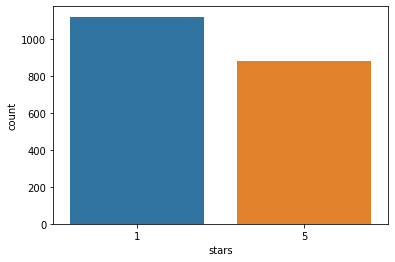

In [8]:
sns.countplot(df_polar.stars);

In [9]:
df_polar

,text,stars
20546,Great little local coffee shop!! Not only do t...,5
32277,I care a tremendous amount about food and the ...,1
1619,The WORST comedy club experience EVER! We go ...,1
32779,Firmly established as one of my favorite spots...,5
24416,$42 bucks for very subpar breakfast which was ...,1
...,...,...
49828,"So my friend and I were on a roadtrip, I saw t...",5
48017,Buettner's doughnuts are the best in the Cleve...,5
37281,I have actually been putting off my Pura Vida ...,5
50073,"The atmosphere was fine, that was the only thi...",1


In [10]:



nlp = English()  # just the language with no model
sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe(sentencizer)
doc = nlp.pipe(df_polar.text, n_process=12, batch_size=100)
#col_list = ['sents', 'score']
#df_sents = pd.DataFrame(columns=col_list)
#df_polar['splits'] = list(doc)




In [11]:
df_polar_sents = pd.DataFrame(columns=['sent', 'score', 'og_text'])
for dfp, dc in tqdm(zip(df_polar.iterrows(), doc), total=len(df_polar)):

    for sent in dc.sents:
        strr = dfp[1].stars
        strr = 1 if strr == 5 else 0
        snt = sent.string
        df_temp = pd.Series({'sent': snt, 'score': strr, 'og_text':dfp[1].text })
        df_polar_sents = df_polar_sents.append(df_temp, ignore_index=True)
doc.close()

<ipython-input-11-84ec43a68edf>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for dfp, dc in tqdm(zip(df_polar.iterrows(), doc), total=len(df_polar)):


In [12]:
df_polar_sents['sent'] = df_polar_sents.sent.str.strip()


In [13]:
df_polar_sents

,sent,score,og_text
0,Great little local coffee shop!!,1,Great little local coffee shop!! Not only do t...
1,Not only do they have great food they also hav...,1,Great little local coffee shop!! Not only do t...
2,I loved the veggie sandwich with goat cheese.,1,Great little local coffee shop!! Not only do t...
3,I love walking up to the Gypsy bean for my cof...,1,Great little local coffee shop!! Not only do t...
4,I stop by at least once a week and I am never...,1,Great little local coffee shop!! Not only do t...
...,...,...,...
16400,This is the only chinese restuarant i would go...,1,"I LOVE this place since it opened, the quality..."
16401,The restuarant was renovated recently.,1,"I LOVE this place since it opened, the quality..."
16402,The menu was updated adding lots of new dishes!,1,"I LOVE this place since it opened, the quality..."
16403,you definity should go check it out!,1,"I LOVE this place since it opened, the quality..."


In [29]:
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(df_polar_sents) #(df_polar_sents)

In [30]:
testdf

,sent,score,og_text
3519,I have no idea why they still let him work the...,0,If you're a woman who likes being harassed by ...
4875,"In short, this was the first time I've ever ha...",1,L'Albatros was stellar to say the least.\n\nTh...
16131,"I was in Cleveland for a conference, staying i...",0,"I was in Cleveland for a conference, staying i..."
10363,That was awesome!,1,Don't be a fool. If you don't ever visit the ...
10846,Mmm!,1,The new menu at this place is delicious!!! Be...
...,...,...,...
15668,We had a 3.5 hour sub-par dinner that did not ...,0,Our dinner club went to Michaelangelo's with v...
12009,My favorite thing about Touch is that on Frida...,1,"Friday, Friday, Friday!\n\nMy favorite thing a..."
5576,He actually started to yell at us.,0,We had a horrible experience at touch. We had ...
14327,"however, this food is just terrible.",0,if you don't know what good mexican food is th...


In [14]:
model_args = {
    "num_train_epochs": 2,
    'reprocess_input_data': True, 
    'overwrite_output_dir': True,
    "fp16": False,
    'regression': True,
    
}

# Create a ClassificationModel
model = ClassificationModel(
    "roberta", "roberta-base", args=model_args,  num_labels=1,
)

In [15]:

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [16]:
model.train_model(df_polar_sents[['sent', 'score']])

C:\tools\miniconda3\envs\yelp_trch\lib\site-packages\simpletransformers\classification\classification_model.py:250: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


Running loss: 0.751529

..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


Running loss: 0.733976

C:\tools\miniconda3\envs\yelp_trch\lib\site-packages\torch\optim\lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.525166

C:\tools\miniconda3\envs\yelp_trch\lib\site-packages\torch\optim\lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running loss: 0.110390


Running loss: 0.010592



INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.


In [22]:
model.predict(('food is so good!',))

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.


(array([1], dtype=int64), array([[-2.7601993,  2.3073685]], dtype=float32))

In [19]:
predictions, raw_outputs = model.predict(["I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?" * 25])
print(predictions)
print(raw_outputs)

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.



[0]
[[ 1.770315  -1.4432509]]
